In [2]:
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
Down_traffic = pd.read_parquet("./Data/Down_traffic.parq")
Up_traffic = pd.read_parquet("./Data/Up_traffic.parq")

In [4]:
Down_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9681 entries, 0 to 9680
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               9681 non-null   datetime64[ns]
 1   LocationLatitude        9681 non-null   float64       
 2   LocationLongitude       9681 non-null   float64       
 3   RadioOperatorName       9681 non-null   category      
 4   RadioNetworkGeneration  9681 non-null   category      
 5   RadioConnectionType     9681 non-null   category      
 6   RadioMobileDataEnabled  9681 non-null   category      
 7   DeviceManufacturer      9681 non-null   category      
 8   DeviceName              9681 non-null   category      
 9   TrafficDirection        9681 non-null   category      
 10  TrafficVolume           9681 non-null   float64       
 11  RSRP                    9681 non-null   float64       
dtypes: category(7), datetime64[ns](1), float64(4)
me

In [5]:
Down_traffic.head(10)

,Timestamp,LocationLatitude,LocationLongitude,RadioOperatorName,RadioNetworkGeneration,RadioConnectionType,RadioMobileDataEnabled,DeviceManufacturer,DeviceName,TrafficDirection,TrafficVolume,RSRP
0,2019-11-01 20:00:00,24.626087,46.689846,Operator C,4G,Mobile,Enabled,SAMSUNG,Galaxy Grand Prime Plus,Downlink,1.244167,-99.777778
1,2019-11-01 20:15:00,24.626087,46.689846,Operator C,4G,Mobile,Enabled,SAMSUNG,Galaxy Grand Prime Plus,Downlink,0.145414,-101.200000
2,2019-11-01 21:00:00,24.526780,46.666590,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy A51,Downlink,0.027583,-89.888889
3,2019-11-01 21:00:00,24.549557,46.691914,Operator B,4G,Mobile,Enabled,SAMSUNG,Galaxy J8,Downlink,164.994614,-69.000000
4,2019-11-01 21:00:00,24.560373,46.865420,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy A70,Downlink,22.345335,-111.666667
5,2019-11-01 21:00:00,24.571188,46.637253,Operator B,4G,Mobile,Enabled,SAMSUNG,Galaxy A20,Downlink,0.319108,-100.250000
6,2019-11-01 21:00:00,24.596653,46.680504,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy Note8,Downlink,75.150810,-83.000000
7,2019-11-01 21:00:00,24.597780,46.633713,Operator A,4G,Mobile,Enabled,HTC,Desire 12,Downlink,19.096824,-88.142857
8,2019-11-01 21:00:00,24.597988,46.723907,Operator A,4G,Mobile,Enabled,HUAWEI,Honor 10I,Downlink,0.030366,-82.000000
9,2019-11-01 21:00:00,24.598774,46.676735,Operator B,4G,Mobile,Enabled,HTC,M9,Downlink,50.598703,-97.400000


In [6]:
Up_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9613 entries, 0 to 9612
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               9613 non-null   datetime64[ns]
 1   LocationLatitude        9613 non-null   float64       
 2   LocationLongitude       9613 non-null   float64       
 3   RadioOperatorName       9613 non-null   category      
 4   RadioNetworkGeneration  9613 non-null   category      
 5   RadioConnectionType     9613 non-null   category      
 6   RadioMobileDataEnabled  9613 non-null   category      
 7   DeviceManufacturer      9613 non-null   category      
 8   DeviceName              9613 non-null   category      
 9   TrafficDirection        9613 non-null   category      
 10  TrafficVolume           9613 non-null   float64       
 11  RSRP                    9613 non-null   float64       
dtypes: category(7), datetime64[ns](1), float64(4)
me

In [7]:
Up_traffic.head(10)

,Timestamp,LocationLatitude,LocationLongitude,RadioOperatorName,RadioNetworkGeneration,RadioConnectionType,RadioMobileDataEnabled,DeviceManufacturer,DeviceName,TrafficDirection,TrafficVolume,RSRP
0,2019-11-01 19:15:00,24.626139,46.689728,Operator C,4G,Mobile,Enabled,SAMSUNG,Galaxy Grand Prime Plus,Uplink,2.731466,-87.000000
1,2019-11-01 20:00:00,24.626087,46.689846,Operator C,4G,Mobile,Enabled,SAMSUNG,Galaxy Grand Prime Plus,Uplink,1.175476,-99.777778
2,2019-11-01 20:15:00,24.626087,46.689846,Operator C,4G,Mobile,Enabled,SAMSUNG,Galaxy Grand Prime Plus,Uplink,0.105763,-101.200000
3,2019-11-01 21:00:00,24.526780,46.666590,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy A51,Uplink,0.027508,-89.888889
4,2019-11-01 21:00:00,24.549557,46.691914,Operator B,4G,Mobile,Enabled,SAMSUNG,Galaxy J8,Uplink,9.920519,-69.000000
5,2019-11-01 21:00:00,24.558767,46.612730,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy A50,Uplink,0.100335,-90.538462
6,2019-11-01 21:00:00,24.560373,46.865420,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy A70,Uplink,1.569905,-111.666667
7,2019-11-01 21:00:00,24.571188,46.637253,Operator B,4G,Mobile,Enabled,SAMSUNG,Galaxy A20,Uplink,0.113349,-100.250000
8,2019-11-01 21:00:00,24.596655,46.680653,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy Note8,Uplink,3.188925,-83.000000
9,2019-11-01 21:00:00,24.596676,46.632065,Operator A,4G,Mobile,Enabled,HTC,Desire 12,Uplink,0.382367,-93.500000


I'll choose the operator A to see the impact of the RSRP improvment on the uplink traffice and the downlink traffic. I'll also choose a random polygon

In [8]:
Down_traffic_poly = sqldf(
"""
SELECT *
FROM Down_traffic
WHERE LocationLongitude BETWEEN 46.8 AND 47
    AND LocationLatitude BETWEEN 24.4 AND 24.6
    AND RadioOperatorName = 'Operator A'
;
""", globals())

Up_traffic_poly = sqldf(
"""
SELECT *
FROM Up_traffic
WHERE LocationLongitude BETWEEN 46.8 AND 47
    AND LocationLatitude BETWEEN 24.4 AND 24.6
    AND RadioOperatorName = 'Operator A'
;
""", globals())

In [9]:
scaler = MinMaxScaler()
Down_traffic_poly[['RSRP', 'TrafficVolume']] = scaler.fit_transform(Down_traffic_poly[['RSRP', 'TrafficVolume']])
scaler = MinMaxScaler()
Up_traffic_poly[['RSRP', 'TrafficVolume']] = scaler.fit_transform(Up_traffic_poly[['RSRP', 'TrafficVolume']])

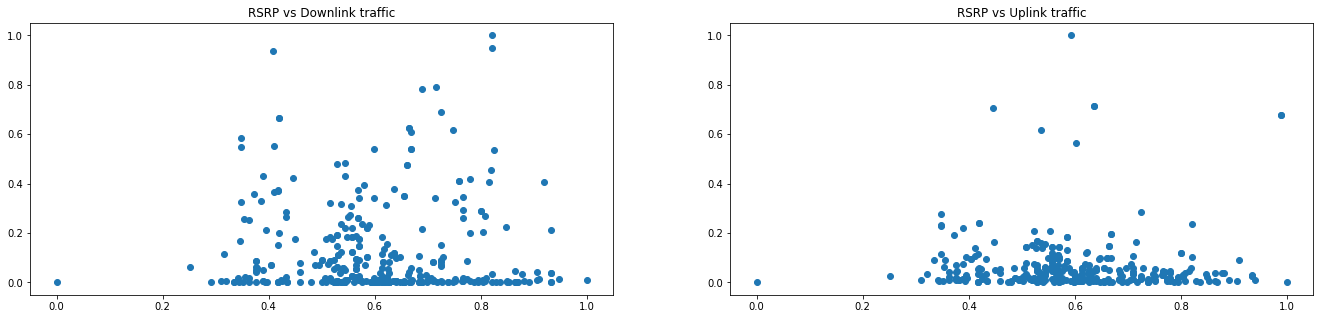

In [21]:
fig,(ax1,ax2) = plt.subplots(1, 2)
ax1.scatter(Down_traffic_poly.RSRP, Down_traffic_poly.TrafficVolume)
ax1.set_title("RSRP vs Downlink traffic")
ax2.scatter(Up_traffic_poly.RSRP, Up_traffic_poly.TrafficVolume)
ax2.set_title("RSRP vs Uplink traffic")
fig.set_figwidth(23)
fig.set_figheight(5) 
plt.show()

In [11]:
Down_traffic_poly.corr(numeric_only=True)

,LocationLatitude,LocationLongitude,TrafficVolume,RSRP
LocationLatitude,1.000000,-0.920562,0.059003,0.147401
LocationLongitude,-0.920562,1.000000,-0.043702,-0.098003
TrafficVolume,0.059003,-0.043702,1.000000,-0.008209
RSRP,0.147401,-0.098003,-0.008209,1.000000


From the graph and the correlation matrix we can see that there's very little correlation between these variable. However, let's try a linear regression model and see how it performs then let's try other algorithms.

# Linear Regression Model

In [12]:
model = LinearRegression()
X = np.array(Down_traffic_poly["RSRP"]).reshape(-1,1)
y = Down_traffic_poly["TrafficVolume"]
model.fit(X, y)

LinearRegression()

In [13]:
model.score(X, y)

6.738178718657117e-05

As I expected the model performed really badly.
Let's try another model.

# Random Forest Model

In [14]:
X_train, X_test, y_train, y_test = train_test_split(Down_traffic_poly.RSRP, Down_traffic_poly.TrafficVolume, test_size=0.33, random_state=42)

In [15]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [16]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
regr.score(X_test, y_test)

-0.13935087983824856

The model is failling as well.

# Conclusion:
The data we have isn't enough to predict the traffic volume given the RSRP value, more variables should be taken into account.